In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyphi
import marshall2024

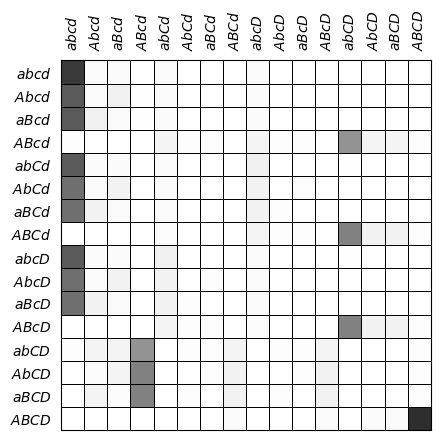

In [2]:
network, state = marshall2024.get_coarsegrain_micro_example()
fig, ax = marshall2024.plot_sbs_tpm(network)
fig.savefig("plots/cg_micro_tpm.svg")

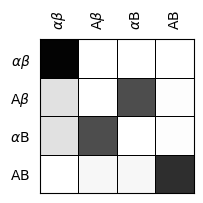

In [3]:
network, state = marshall2024.get_coarsegrain_macro_example()
fig, ax = marshall2024.plot_sbs_tpm(network, height=2)
fig.savefig("plots/cg_macro_tpm.svg")

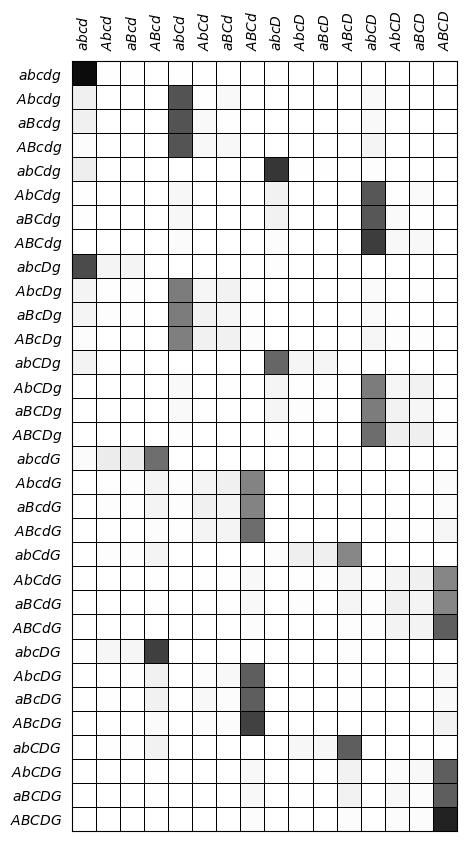

In [5]:
network, state = marshall2024.get_blackbox_micro_example()
#fig, ax = marshall2024.plot_sbs_tpm(network, height=40, use_node_labels=True)
#fig.savefig("plots/bbx_micro_full_tpm.svg")

use_node_labels=True
height = 10
subset = (0, 1, 2, 3, 6)

def _italicize(text):
    return "$\it{" + "".join(text) + "}$"

cause_subsystem = pyphi.Subsystem(
    network, state, subset, backward_tpm=True
)
subsystem_node_labels = tuple(cause_subsystem.node_labels[i] for i in cause_subsystem.node_indices)
subsystem_node_labels = pyphi.node.NodeLabels(subsystem_node_labels, tuple(np.arange(len(subsystem_node_labels))))

sbs = pyphi.convert.state_by_node2state_by_state(cause_subsystem.proper_tpm)
input_states_labels = list(pyphi.utils.all_states(cause_subsystem.size))

n_output_states = sbs.shape[1] // 2
sbs = sbs[:, :n_output_states] + sbs[:, n_output_states:]

if use_node_labels:
    input_state_labels = [
        pyphi.visualize.phi_structure.text.Labeler(
            state, subsystem_node_labels, postprocessor=_italicize
        ).nodes(subsystem_node_labels.node_indices)
        for state in input_states_labels
    ]
    output_state_labels = [
        pyphi.visualize.phi_structure.text.Labeler(
            state, subsystem_node_labels, postprocessor=_italicize
        ).nodes(subsystem_node_labels.node_indices[:-1])
        for state in input_states_labels[:n_output_states]
    ]

figsize = None if height is None else (height / 2, height)
fig, ax = plt.subplots(figsize=figsize)
ax.pcolormesh(sbs, edgecolors="k", linewidth=0.5, cmap="Greys", vmin=0, vmax=1)
ax.tick_params(
    top=False,
    labeltop=use_node_labels,
    bottom=False,
    labelbottom=False,
    left=False,
    labelleft=use_node_labels,
)
if use_node_labels:
    ax.set_xticks(
        np.arange(len(output_state_labels)) + 0.5, labels=output_state_labels, rotation=90
    )
    ax.set_yticks(np.arange(len(input_state_labels)) + 0.5, labels=input_state_labels)
ax.set_aspect("equal")
ax.invert_yaxis()

#return fig, ax
fig.savefig("plots/bbx_micro_half_tpm.svg")

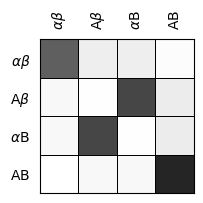

In [6]:
network, state = marshall2024.get_blackbox_macro_example()
fig, ax = marshall2024.plot_sbs_tpm(network, height=2)
fig.savefig("plots/bbx_macro_tpm.svg")

In [7]:
def get_mappings(n_micro_elements):
    micro_states = np.array(list(pyphi.utils.all_states(n_micro_elements)))
    n_micro_states = micro_states.shape[0]
    for macro_state in pyphi.utils.all_states(n_micro_states):
        yield micro_states, np.atleast_2d(macro_state).T

def plot_mapping(micro_states, macro_states, micro_node_labels, macro_node_labels, figsize=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, width_ratios=(micro_states.shape[1], 1))
    ax1.pcolormesh(micro_states, edgecolors="grey", linewidth=0.5, cmap="Greys", vmin=0, vmax=1)
    ax2.pcolormesh(macro_states, edgecolors="grey", linewidth=0.5, cmap="Greys", vmin=0, vmax=1)
    for ax in (ax1, ax2):
        ax.tick_params(top=False, labeltop=False, bottom=False, labelbottom=True)
        ax.set_yticks([])
        ax.invert_yaxis()
    ax1.set_xticks(
        np.arange(len(micro_node_labels)) + 0.5,
        labels=micro_node_labels,
        fontsize=12,
    )
    ax2.set_xticks(
        np.arange(len(macro_node_labels)) + 0.5,
        labels=macro_node_labels,
        fontsize=12,
    )
    return fig, (ax1, ax2)


if False:
    micro_node_labels = ("A", "B")
    macro_node_labels = ("α")
    mappings = list(get_mappings(len(micro_node_labels)))
    for i, (micro_states, macro_states) in enumerate(mappings):
        fig, ax = plot_mapping(micro_states, macro_states, micro_node_labels, macro_node_labels, figsize=(1, 3))
        fig.savefig(f"plots/mappings/mapping{i}.svg")

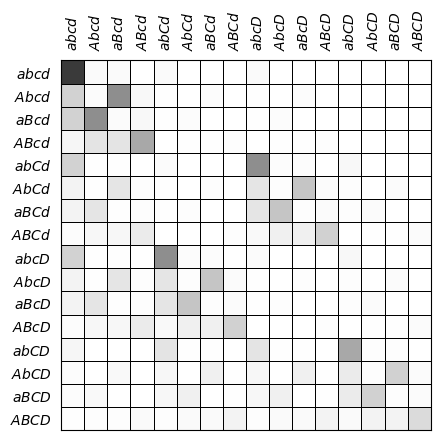

In [8]:
network, _ = marshall2024.get_something_from_nothing_micro_example()
fig, ax = marshall2024.plot_sbs_tpm(network)
fig.savefig("plots/sfn_micro_tpm.svg")

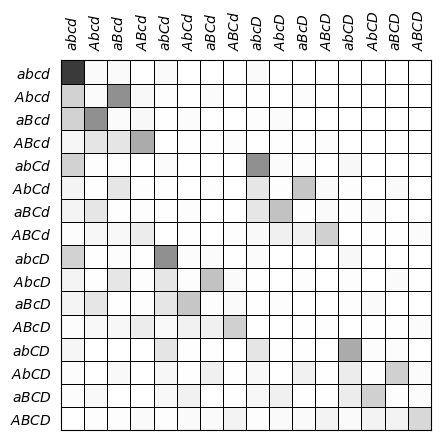

In [9]:
network, _ = marshall2024.get_something_from_nearly_nothing_micro_example()
fig, ax = marshall2024.plot_sbs_tpm(network)
fig.savefig("plots/sfnn_micro_tpm.svg")

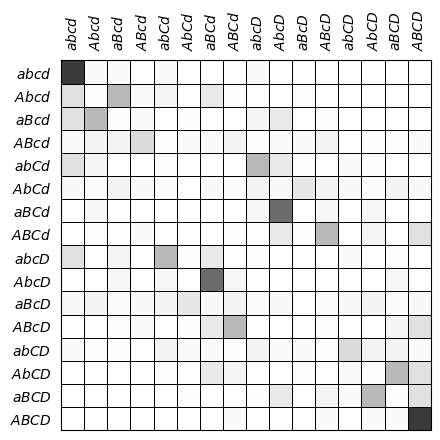

In [10]:
network, _ = marshall2024.get_something_from_something_micro_example()
fig, ax = marshall2024.plot_sbs_tpm(network)
fig.savefig("plots/sfs_micro_tpm.svg")